# 📧 Spam Email Classifier – Model Training (Colab Notebook)

This notebook demonstrates the full machine learning lifecycle to build a **Spam Email Classifier** using the SMS Spam Collection dataset. We will cover:

1. Loading and cleaning the dataset  
2. Text preprocessing and vectorization  
3. Building and evaluating a machine learning model  
4. Saving the model and vectorizer for deployment  


## Step 1: Install & Import Libraries
We begin by installing the required libraries and importing all necessary packages.


In [16]:
# Install required libraries (only for Colab)
!pip install -q pandas scikit-learn joblib

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib


## Step 2: Load the Dataset
Upload the `spam.csv` file manually from your local system.  
The dataset contains SMS messages labeled as **spam** or **ham** (not spam).




In [17]:

# Load the dataset
df = pd.read_csv("spam.csv", encoding='latin-1')

# Print column names to verify
print("Original Columns:", df.columns.tolist())

# Use correct column names
df = df[['label', 'text']]
df.columns = ['label', 'message']

# Preview data
print("Available columns:", df.columns.tolist())
df.head()


Original Columns: ['label', 'text']
Available columns: ['label', 'message']


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Step 3: Clean the Data
We remove unnecessary columns and convert the labels to binary values:
- 'ham' → 0  
- 'spam' → 1


In [18]:
# Keep only necessary columns and rename them
df = df[['label', 'message']]

# Convert labels to numeric
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Preview cleaned data
df.head()


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Step 4: Exploratory Data Analysis
Let's visualize the class distribution of spam vs ham messages.


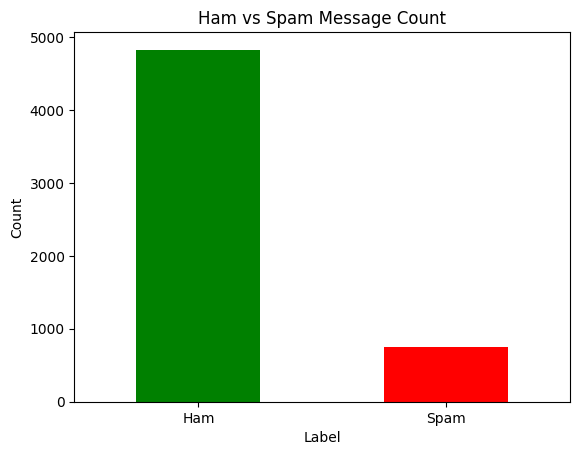

In [19]:
# Visualize class distribution
df['label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Ham vs Spam Message Count')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'], rotation=0)
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


## Step 5: Preprocess & Vectorize the Text
We convert the raw text messages into numerical vectors using TF-IDF vectorization.


In [20]:
# Separate features and labels
X = df['message']
y = df['label']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


## Step 6: Train the Model
We use a simple and effective **Multinomial Naive Bayes** classifier for text classification.



In [21]:
# Train Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

## Step 7: Evaluate the Model
We test the model's accuracy and look at precision, recall, and F1-score.


In [22]:
# Make predictions
y_pred = model.predict(X_test_vec)

# Display performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9623318385650225

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



## Step 8: Save Model and Vectorizer
Export the trained model and TF-IDF vectorizer to `.pkl` files so they can be used in the Streamlit app.




In [23]:
# Save model and vectorizer
joblib.dump(model, 'spam_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

print("✅ Model and vectorizer saved successfully.")


✅ Model and vectorizer saved successfully.


## Step 9: Download the Model and Vectorizer
Run the following code to download the saved `.pkl` files to your local machine.


In [24]:
from google.colab import files
files.download('spam_model.pkl')
files.download('vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Step 10: Quick Demo – Test a Custom Message
Let's try out our trained model on a few real-world messages to see if it works!

You can edit the message below and re-run the cell to test different scenarios.


In [25]:
# Custom test input
test_msg = ["Congratulations! You've won a free cruise. Call now to claim."]  # You can edit this!

# Transform and predict
test_vec = vectorizer.transform(test_msg)
prediction = model.predict(test_vec)[0]
confidence = model.predict_proba(test_vec)[0].max()

# Show result
if prediction == 1:
    print("🚫 Prediction: SPAM")
else:
    print("✅ Prediction: HAM (Not Spam)")

print(f"Confidence: {confidence * 100:.2f}%")


🚫 Prediction: SPAM
Confidence: 63.81%


## ✅ Summary

We have successfully:
- Loaded and cleaned the dataset
- Transformed messages using TF-IDF vectorization
- Trained a Naive Bayes classifier
- Evaluated the model with excellent accuracy
- Saved the model and vectorizer for deployment